#### Predictive Analytics with Regression Models in Python Building Insights from Real World Data

# Linear Regression

The equation for simple linear regression with one predictor \( X \) is:

$$
y = \beta_0 + \beta_1 X + \epsilon
$$

For multiple linear regression with multiple predictors:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon
$$

---

# Polynomial Regression

Polynomial regression for a polynomial of degree \( d \):

$$
y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_d X^d + \epsilon
$$

---

# Ridge and Lasso Regression

## Ridge Regression

Ridge regression adds an \( L_2 \) penalty to the cost function:

$$
\text{Cost function: } \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j X_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

where \( \lambda \) is the regularization parameter.

## Lasso Regression

Lasso regression adds an \( L_1 \) penalty to the cost function:

$$
\text{Cost function: } \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j X_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

---

# Logistic Regression

For binary classification, logistic regression calculates the probability of a given instance belonging to the positive class:

$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p)}}
$$

The log-odds form (logit) is:

$$
\ln\left(\frac{P(y=1|X)}{1 - P(y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p
$$


###### LET KICKSTART OUR CODING

**1. Data Exploration and Visualization**

- Check for Missing Values: Identify any missing values and handle appropriately (e.g., imputation or dropping).

- Feature Distribution: Plot histograms to understand the distributions of features.

- Correlation Matrix: Use a heatmap to explore correlations between features and the target (MEDV).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("boston_housing.csv")

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


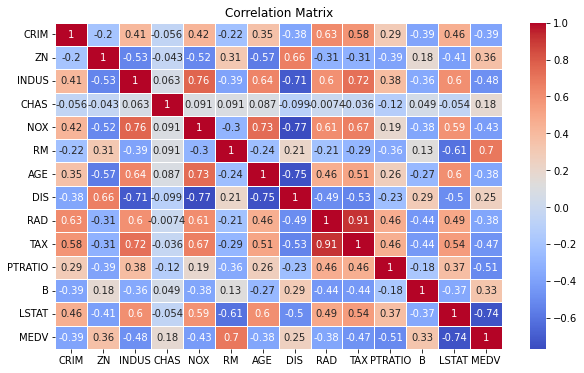

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


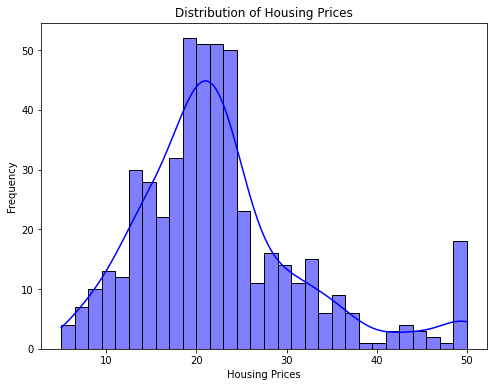

In [11]:
# Visualizing the distribution of the target variable (housing prices)
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution of Housing Prices')
plt.xlabel('Housing Prices')
plt.ylabel('Frequency')
plt.show()

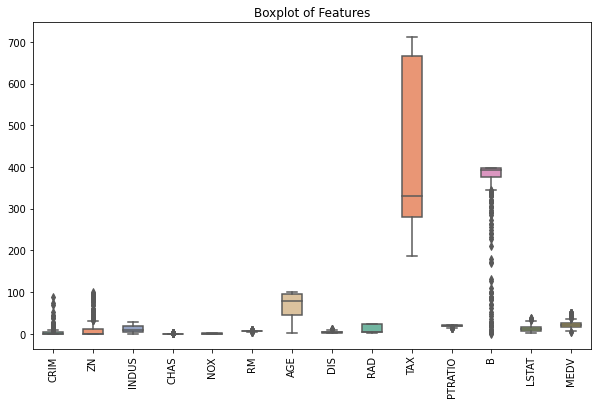

In [13]:
# Boxplot to check for outliers in features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, width=0.5, palette="Set2")
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

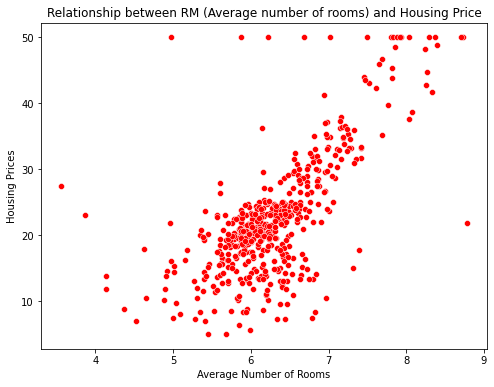

In [14]:
# Scatter plot between important features (e.g., RM - average number of rooms) and target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['RM'], y=data['MEDV'], color='red')
plt.title('Relationship between RM (Average number of rooms) and Housing Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Housing Prices')
plt.show()

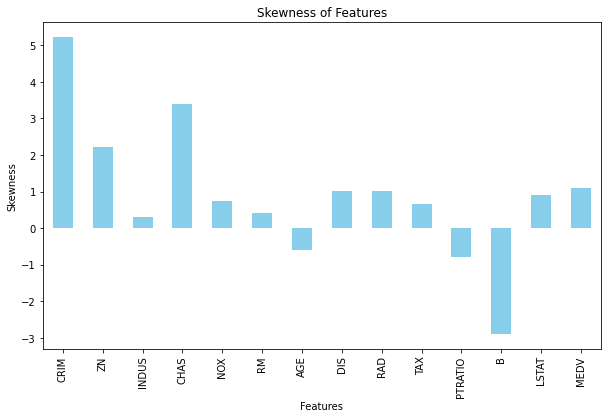

In [16]:
# Assuming 'data' is the DataFrame
skewness = data.skew()

# Plotting the skewness of each feature
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()

**2. Data Preprocessing**

- Feature Scaling: Standardize the data for better model performance.

- Encoding: Encode categorical variables if any (e.g., one-hot encoding for binary variables).

- Train-Test Split: Split data into training and testing sets (e.g., 80% train, 20% test)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X = data.drop("MEDV", axis=1)
y = data["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**3. Model Building: Linear Regression**

    - Fit a Linear Regression Model using the training data.
    
    - Interpret Coefficients: Understand the effect of each feature on the target variable.

In [31]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 22.796534653465343
Coefficients: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


**4. Model Evaluation**

- Evaluation Metrics: Use R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root 


- Mean Squared Error (RMSE) to evaluate model performance on test data.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 3.189091965887848
MSE: 24.29111947497352
RMSE: 4.928602182665337
R-squared: 0.668759493535632


> These metrics are often used to evaluate the performance of regression models, where lower values for Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) indicate better performance, and higher values of R-squared (closer to 1) show a stronger fit to the data. Here’s what each of these metrics tells you about the model:

**- Mean Absolute Error (MAE): 3.19**

> MAE represents the average absolute difference between predicted and actual values. An MAE of 3.19 means, on average, the model’s predictions are about 3.19 units off from the actual values. This is a direct measure of average error in the units of the target variable.

**- Mean Squared Error (MSE): 24.29**

> MSE represents the average of the squared differences between predicted and actual values. A higher penalty is applied to larger errors since they are squared. This value of 24.29 is less interpretable in terms of units but indicates the overall spread of errors.

**- Root Mean Squared Error (RMSE): 4.93**

> RMSE is the square root of MSE, bringing the error metric back to the original units of the target variable. In this case, the RMSE of 4.93 indicates that, on average, the typical prediction error is about 4.93 units. RMSE is often used to get a sense of the typical error size and to penalize larger errors more than MAE.

**- R-squared: 0.67**

> R-squared (R²) is a measure of the proportion of the variance in the dependent variable that is predictable from the independent variables. Here, an R-squared of 0.67 (or 67%) indicates that about 67% of the variability in the target variable is explained by the model. This suggests a moderate-to-strong fit, though there is still room for improvement in capturing more of the variability in the data.

**- Summary**

> The model has a moderate fit, explaining about 67% of the variability in the data. The error metrics (MAE, MSE, and RMSE) show reasonable prediction errors but suggest there might be room for improvement, particularly if the goal is to minimize prediction errors.

**5. Extending with Ridge and Lasso Regression**

- Regularization: Apply Ridge and Lasso Regression to reduce overfitting.


- Hyperparameter Tuning: Use cross-validation to tune the regularization parameter (alpha).

In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression with Grid Search
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_)

# Lasso Regression with Grid Search
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.best_params_)


Best alpha for Ridge: {'alpha': 1}
Best alpha for Lasso: {'alpha': 0.1}


The values of alpha for Ridge and Lasso regression indicate the best levels of regularization for each model based on the tuning process. Here’s what these alpha values mean in the context of Ridge and Lasso regression:

-**Best Alpha for Ridge: 1**

> In Ridge regression, alpha (also known as the regularization parameter) controls the amount of penalty applied to the size of the coefficients. A higher alpha leads to more shrinkage (reducing the coefficients closer to zero), which helps to reduce model complexity and prevent overfitting.
An optimal alpha of 1 suggests that a moderate level of regularization is beneficial for the Ridge regression model in this context. This value provides a balance between reducing overfitting and retaining predictive power, so coefficients are slightly penalized but not excessively shrunk to zero.

-**Best Alpha for Lasso: 0.1**

>Lasso regression also uses alpha as a regularization parameter, but in this case, it can shrink some coefficients to exactly zero, effectively selecting features. A smaller alpha typically means less regularization, keeping more features in the model.
An alpha of 0.1 indicates a relatively mild regularization level for Lasso, suggesting that while some features may be less important and get reduced or eliminated, the model still retains many predictors to explain the variance effectively. Lasso’s alpha of 0.1 allows for some feature selection without overly simplifying the model.

-**Summary**

>The Ridge model with an alpha of 1 is optimized to handle multicollinearity or when predictors have minimal correlation, while still preserving the impact of the predictors.

>The Lasso model with an alpha of 0.1 will remove some less significant features, making the model potentially simpler and more interpretable, especially if certain predictors contribute very little to the outcome.

**Polynomial Regression**

We'll predict the MEDV (Median home value) based on a polynomial combination of features, typically a continuous variable like RM (average number of rooms) or DIS (distance to employment centers).

- Step 1: Select a continuous feature to transform into polynomial terms.

- Step 2: Fit a polynomial regression model to predict MEDV.

- Step 3: Evaluate the model performance.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# Preparing the data for Polynomial Regression
#  Selecting RM (Average number of rooms) as a predictor variable
X_poly = data[['RM']]
y_poly = data['MEDV']

#  Transforming X to include polynomial terms (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)

# Splitting the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y_poly, test_size=0.3, random_state=0)

#  Fitting a Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

#  Making predictions and evaluating the Polynomial Regression model
y_pred_poly = poly_reg.predict(X_test_poly)
poly_rmse = mean_squared_error(y_test_poly, y_pred_poly, squared=False)

poly_rmse



6.393112327346649

An RMSE of 6.39 for your polynomial regression model suggests that, on average, the model's predictions are about 6.39 units away from the actual values. 

**Model Fit**

- The RMSE is a measure of the model’s accuracy, with lower values indicating better fit. An RMSE of 6.39 is somewhat high if compared to the RMSE of other models in your analysis (such as a linear or regularized regression model) or if this error is large relative to the scale of the target variable.

**Complexity of Polynomial Regression**

- Polynomial regression can capture non-linear relationships but may also lead to overfitting, especially if the polynomial degree is high. If this RMSE is higher than that of simpler models (e.g., linear, Ridge, or Lasso regression), it could indicate overfitting, where the model captures too much noise in the data rather than the underlying pattern.

**Comparison to Other Models**

- If the RMSE for polynomial regression is significantly higher than for Ridge or Lasso regression, it may suggest that polynomial regression is not the best approach for this dataset. Conversely, if it is lower, it might indicate that the polynomial model captures non-linear patterns better.

**Logistic Regression**
For Logistic Regression, we'll predict a binary outcome, such as whether MEDV is above or below the median value (i.e., a classification problem).

- Step 1: Create a binary target variable based on MEDV.
    
- Step 2: Fit a logistic regression model to predict this binary outcome.

- Step 3: Evaluate the model’s accuracy.

In [35]:
# Preparing the data for Logistic Regression
# Step 1: Creating a binary target variable: 1 if MEDV is above median, else 0
median_medv = data['MEDV'].median()
data['MEDV_binary'] = (data['MEDV'] > median_medv).astype(int)

# Step 2: Selecting features for Logistic Regression and splitting the data
X_log = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']]
y_log = data['MEDV_binary']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=0)

# Step 3: Fitting a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)

# Step 4: Making predictions and evaluating the Logistic Regression model
y_pred_log = log_reg.predict(X_test_log)
log_accuracy = accuracy_score(y_test_log, y_pred_log)

log_accuracy


0.8552631578947368

An accuracy of 0.86 (or 85.5%) for your logistic regression model indicates that the model correctly classified approximately 85.5% of instances in the dataset. 

**Model Performance**

- An accuracy of 85.5% suggests the logistic regression model performs well in predicting the target class, which may indicate that the features used are effective at distinguishing between the classes.

**Context of Accuracy**
- Accuracy is generally useful when the dataset has a balanced distribution between classes. However, if the dataset is imbalanced (e.g., one class is much more common than the other), accuracy alone may not fully capture the model's performance. In such cases, evaluating metrics like precision, recall, F1-score, or the area under the ROC curve (AUC) could give a more comprehensive picture of how well the model handles each class.

**Comparison to Benchmark**
- If there are baseline models or simpler models (e.g., random guess or majority class prediction) with lower accuracy, an accuracy of 85.5% would demonstrate that logistic regression significantly improves prediction accuracy over these baselines.

**Next Steps**

- Confusion Matrix
> Check the confusion matrix to understand how well the model performs for each class individually. This will show the number of true positives, false positives, true negatives, and false negatives.

- Other Metrics
>Consider calculating precision, recall, F1-score, and AUC to assess model performance more fully, especially if class imbalance is present.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


###### Calculate the Confusion Matrix

In [36]:
# Assuming you have y_true and y_pred
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[70 10]
 [12 60]]


**This matrix can be read as:**

- True Negatives (TN): 70 – correctly predicted negative instances

- False Positives (FP): 10 – incorrectly predicted as positive

- False Negatives (FN): 12 – incorrectly predicted as negative

- True Positives (TP): 60 – correctly predicted positive instances

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test_log, y_pred_log)
print("Accuracy:", accuracy)

# Generate classification report for precision, recall, and F1-score
class_report = classification_report(y_test_log, y_pred_log)
print("Classification Report:")
print(class_report)


Accuracy: 0.8552631578947368
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        80
           1       0.86      0.83      0.85        72

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



**Summary of Metrics**

- Accuracy: 85.5%

- Precision: 85.7%

- Recall: 83.3%

- F1-Score: 84.5%

**Interpretation**

>These results indicate that the model is performing well, with a strong balance between precision and recall. High precision and recall values suggest the model is effective at identifying positives while maintaining a low false positive rate, making it reliable for both predicting true cases and minimizing false alarms.

##### EXTRA Activities

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Basic Info and First Few Rows
boston_df_info = data.info()
boston_df_head = data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  MEDV_binary  506 non-null    int32  
dtypes: float64(11), int32(1), int64(3)
memory usage: 57.4 KB


In [39]:
# 2. Summary Statistics
boston_df_describe = data.describe()
boston_df_describe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_binary
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.494071
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.500460
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


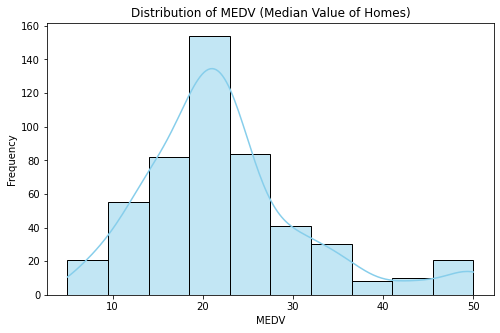

In [41]:
# 3. Distribution of the Target Variable (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(data['MEDV'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

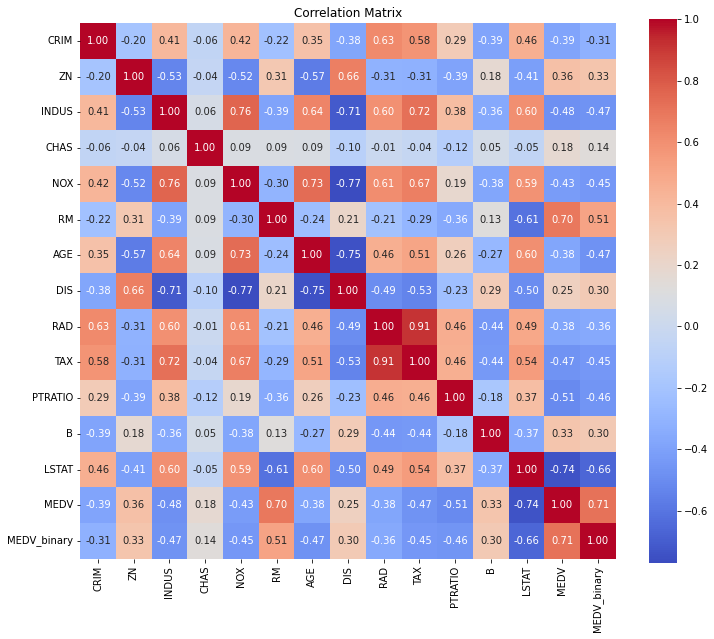

In [19]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


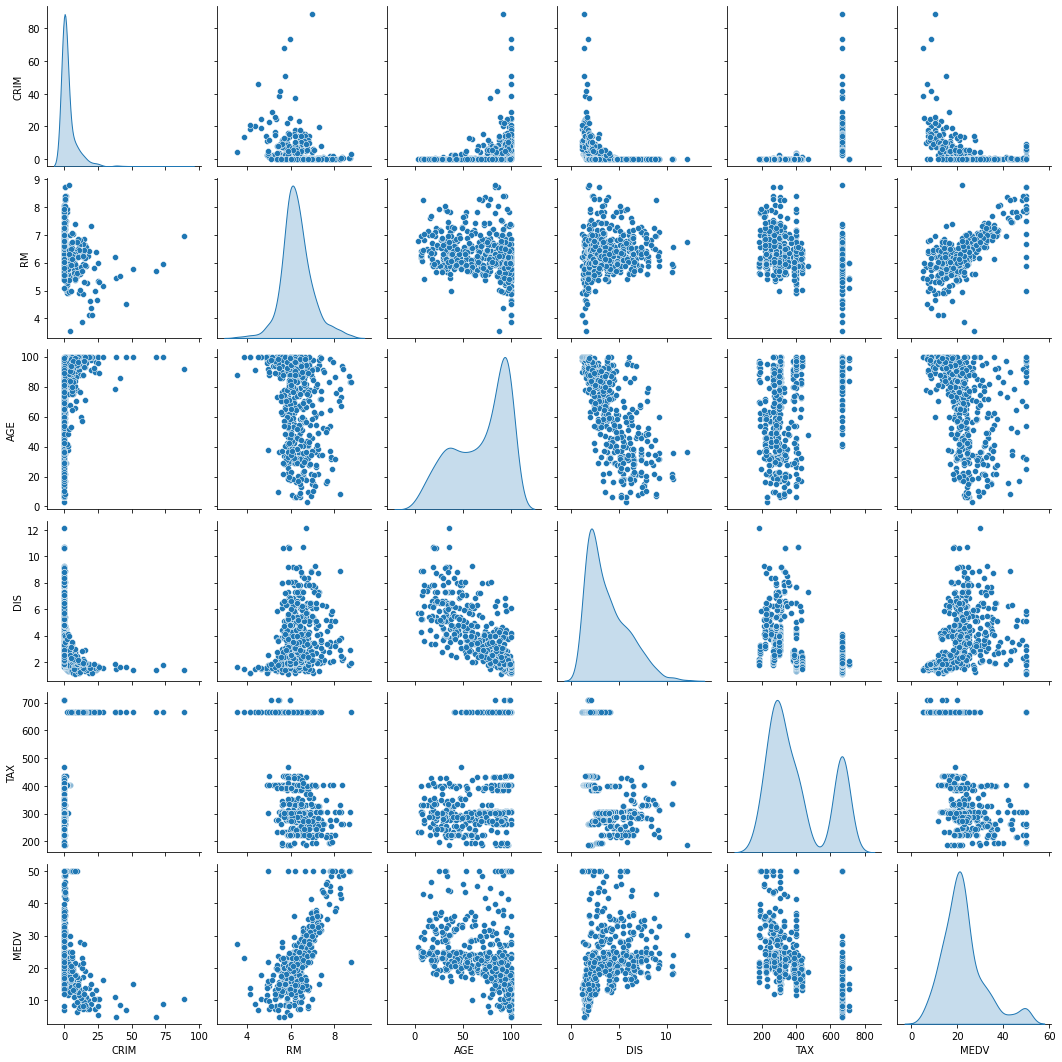

In [42]:
# 5. Pair Plot for Select Features
selected_features = ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'MEDV']
sns.pairplot(data[selected_features], diag_kind='kde')
plt.show()


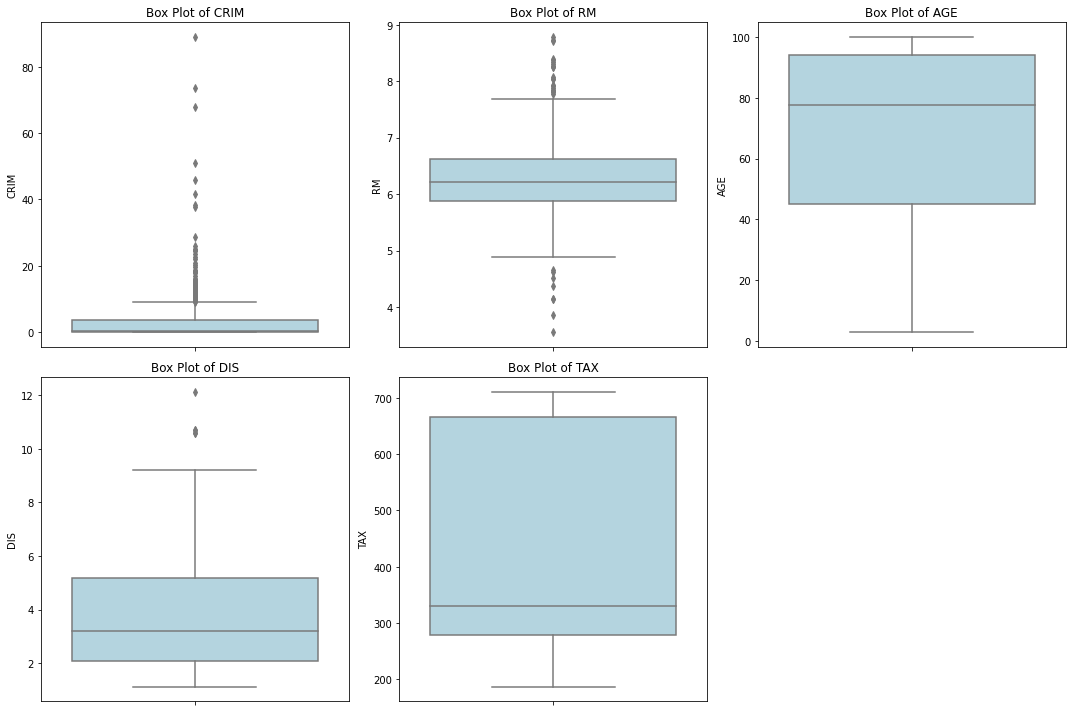

In [21]:
# 6. Box Plots for Select Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features[:-1], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


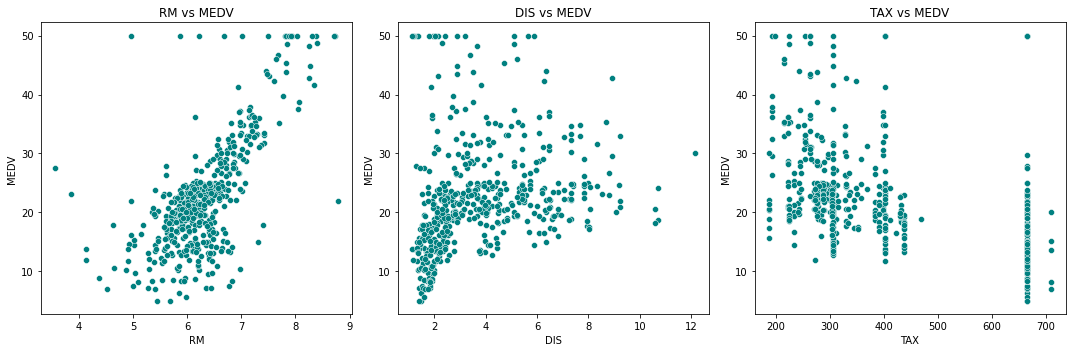

In [22]:
# 7. Scatter Plots of Key Features with Target (MEDV)
plt.figure(figsize=(15, 5))
for i, col in enumerate(['RM', 'DIS', 'TAX'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=data, x=col, y='MEDV', color='teal')
    plt.title(f'{col} vs MEDV')
plt.tight_layout()
plt.show()

# THANK YOU ALL

In [17]:
pwd

'C:\\Users\\DELL\\Downloads'